In [1]:
%matplotlib inline

In [2]:
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///../Sqlalchemy_challenge_hw/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
# Check to see how the data in each tables look like
# Measurement
for row in session.query(Measurement, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).limit(5).all():
    print(row)

(<sqlalchemy.ext.automap.measurement object at 0x000001A7A1FEC548>, 'USC00519397', '2010-01-01', 0.08, 65.0)
(<sqlalchemy.ext.automap.measurement object at 0x000001A7A1FEC4C8>, 'USC00519397', '2010-01-02', 0.0, 63.0)
(<sqlalchemy.ext.automap.measurement object at 0x000001A7A1FEC688>, 'USC00519397', '2010-01-03', 0.0, 74.0)
(<sqlalchemy.ext.automap.measurement object at 0x000001A7A1FEC708>, 'USC00519397', '2010-01-04', 0.0, 76.0)
(<sqlalchemy.ext.automap.measurement object at 0x000001A7A1FEC788>, 'USC00519397', '2010-01-06', None, 73.0)


In [12]:
# How does Station table look like?
for row in session.query(Station, Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation).limit(5).all():
    print(row)

(<sqlalchemy.ext.automap.station object at 0x000001A7A1FF3BC8>, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(<sqlalchemy.ext.automap.station object at 0x000001A7A1FF3AC8>, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(<sqlalchemy.ext.automap.station object at 0x000001A7A1FF3D08>, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(<sqlalchemy.ext.automap.station object at 0x000001A7A1FF3D88>, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(<sqlalchemy.ext.automap.station object at 0x000001A7A1FF3E08>, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)


In [13]:
from sqlalchemy import and_
from sqlalchemy import or_
import datetime as dt

In [14]:
# Calculate the date 1 year ago from the last data point in the database
# Suppose I plan to go to HI from 2017-01-01 to 2017-01-10
# Reference https://stackoverflow.com/questions/5158160/python-get-datetime-for-3-years-ago-today
date = dt.datetime(2017, 1, 10)
year_ago=date - dt.timedelta(days=365)
print(year_ago)

2016-01-11 00:00:00


In [15]:
# Get average precipitation per month between 2016-01-11 and 2017-01-10
precip=session.query(Measurement.date, func.avg(Measurement.prcp)).\
    filter(and_(Measurement.date >= '2016-01-11', Measurement.date <= '2017-01-10')).\
    group_by(func.strftime('%m',Measurement.date))

for result in precip:
    print(result[:])


('2016-01-11', 0.040705882352941154)
('2016-02-01', 0.054444444444444434)
('2016-03-01', 0.0880924855491329)
('2016-04-01', 0.13545454545454547)
('2016-05-01', 0.17421052631578948)
('2016-06-01', 0.21231213872832372)
('2016-07-01', 0.4016564417177914)
('2016-08-01', 0.3077222222222223)
('2016-09-01', 0.285549132947977)
('2016-10-01', 0.12162011173184357)
('2016-11-01', 0.12023391812865496)
('2016-12-01', 0.19949438202247183)


In [16]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# reference https://www.geeksforgeeks.org/create-a-pandas-dataframe-from-lists/
# reference https://pythonexamples.org/pandas-set-column-as-index/

df = pd.DataFrame(precip, columns =['dates', 'avg_precip']) 

#set date column as index
df = df.set_index('dates')

df

,avg_precip
dates,
2016-01-11,0.040706
2016-02-01,0.054444
2016-03-01,0.088092
2016-04-01,0.135455
2016-05-01,0.174211
2016-06-01,0.212312
2016-07-01,0.401656
2016-08-01,0.307722
2016-09-01,0.285549


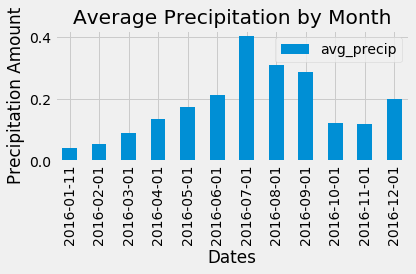

In [17]:
 # Plot the Results in a Matplotlib bar chart
df.plot.bar()
plt.title("Average Precipitation by Month")
plt.xlabel("Dates")
plt.ylabel("Precipitation Amount")
plt.tight_layout()
plt.show()

In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data

# get all the precipitation data
precip2=session.query(Measurement.date, Measurement.prcp).\
    filter(and_(Measurement.date >= '2016-01-11', Measurement.date <= '2017-01-10'))

for result in precip2:
    print(result[:])


('2016-01-11', 0.0)
('2016-01-12', 0.0)
('2016-01-13', 0.0)
('2016-01-14', 0.0)
('2016-01-15', 0.0)
('2016-01-16', 0.01)
('2016-01-17', 0.0)
('2016-01-18', 0.0)
('2016-01-19', 0.0)
('2016-01-20', 0.0)
('2016-01-21', 0.0)
('2016-01-22', 0.0)
('2016-01-23', 0.0)
('2016-01-24', 0.0)
('2016-01-25', 0.04)
('2016-01-26', 0.16)
('2016-01-27', 0.01)
('2016-01-28', 0.0)
('2016-01-29', 0.0)
('2016-01-30', 0.0)
('2016-01-31', 0.0)
('2016-02-01', 0.0)
('2016-02-02', 0.06)
('2016-02-03', 0.0)
('2016-02-04', 0.0)
('2016-02-05', 0.0)
('2016-02-06', 0.0)
('2016-02-07', 0.02)
('2016-02-08', 0.01)
('2016-02-09', 0.0)
('2016-02-10', 0.0)
('2016-02-11', 0.0)
('2016-02-12', 0.02)
('2016-02-13', 0.0)
('2016-02-14', 0.0)
('2016-02-15', 0.0)
('2016-02-16', 0.02)
('2016-02-17', 0.21)
('2016-02-18', 0.02)
('2016-02-19', 0.03)
('2016-02-20', 0.01)
('2016-02-21', 0.0)
('2016-02-22', 0.0)
('2016-02-23', 0.0)
('2016-02-24', 0.0)
('2016-02-25', 0.0)
('2016-02-26', 0.0)
('2016-02-27', 0.0)
('2016-02-28', 0.0)
('2016-

In [19]:
# Create data frame to hold the data

df2 = pd.DataFrame(precip2, columns =['dates2', 'prcp2']) 
df2.dropna()
df2

,dates2,prcp2
0,2016-01-11,0.00
1,2016-01-12,0.00
2,2016-01-13,0.00
3,2016-01-14,0.00
4,2016-01-15,0.00
...,...,...
2306,2017-01-06,0.10
2307,2017-01-07,0.00
2308,2017-01-08,0.03
2309,2017-01-09,0.00


In [20]:
# Calculate summary statistics

total=df2['prcp2'].sum()
print(f'Total rain dall: {total}')

average = df2['prcp2'].mean()
print(f'Average rain fall: {average}')

median = df2['prcp2'].median()
print(f'Median rain fall: {median}')

max = df2['prcp2'].max()
print(f'Maximum rain fall: {max}')

min=df2['prcp2'].min()
print(f'Minimum rain fall: {min}')

Total rain dall: 369.44
Average rain fall: 0.1785596906718222
Median rain fall: 0.02
Maximum rain fall: 9.64
Minimum rain fall: 0.0


In [21]:
# Design a query to show how many stations are available in this dataset?

# get all the station information to look at the data
w_station=session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation)

for result in w_station:
    print(result[:])

('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


In [22]:
# Count the number of station
num_station=session.query(Station.station, Station.name).\
    group_by(Station.station, Station.name).count()

print(f'Number of stations is {num_station}')

Number of stations is 9


In [23]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

# Get all the measurement information and check the first 10 records
new_measure=session.query(Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).limit(10).all()

for result in new_measure:
    print(result[:])

('USC00519397', '2010-01-01', 0.08, 65.0)
('USC00519397', '2010-01-02', 0.0, 63.0)
('USC00519397', '2010-01-03', 0.0, 74.0)
('USC00519397', '2010-01-04', 0.0, 76.0)
('USC00519397', '2010-01-06', None, 73.0)
('USC00519397', '2010-01-07', 0.06, 70.0)
('USC00519397', '2010-01-08', 0.0, 64.0)
('USC00519397', '2010-01-09', 0.0, 68.0)
('USC00519397', '2010-01-10', 0.0, 73.0)
('USC00519397', '2010-01-11', 0.01, 64.0)


In [24]:
# Join two tables on station ids
# Keep Station.station, Station.name from Station, 
# Keep Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs from Measurement

sel = [Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs, Station.name]
stati_measu = session.query(*sel).filter(Measurement.station == Station.station).limit(3).all()

for result in stati_measu:
    (m_sta, m_d, m_p, m_t, s_n) = result
    print(f"{m_sta}, {m_d}, {m_p}, {m_t}, {s_n}")

USC00519397, 2010-01-01, 0.08, 65.0, WAIKIKI 717.2, HI US
USC00519397, 2010-01-02, 0.0, 63.0, WAIKIKI 717.2, HI US
USC00519397, 2010-01-03, 0.0, 74.0, WAIKIKI 717.2, HI US


In [26]:
# Count the station ID  

count_station=session.query((Measurement.station), func.count(Measurement.station)).group_by(Measurement.station)

for result in count_station:
    (m_s,c_s)=result
    print(f"{m_s},{c_s}")
                  

USC00511918,1979
USC00513117,2709
USC00514830,2202
USC00516128,2612
USC00517948,1372
USC00518838,511
USC00519281,2772
USC00519397,2724
USC00519523,2669


In [28]:
# Save it in Data Frame
count_station_df = pd.DataFrame(count_station, columns =['station', 'record_count']) 
count_station_df

,station,record_count
0,USC00511918,1979
1,USC00513117,2709
2,USC00514830,2202
3,USC00516128,2612
4,USC00517948,1372
5,USC00518838,511
6,USC00519281,2772
7,USC00519397,2724
8,USC00519523,2669


In [31]:
# Order the data frame by descending order
result = count_station_df.sort_values(by=['record_count'],ascending=False)
result

,station,record_count
6,USC00519281,2772
7,USC00519397,2724
1,USC00513117,2709
8,USC00519523,2669
3,USC00516128,2612
2,USC00514830,2202
0,USC00511918,1979
4,USC00517948,1372
5,USC00518838,511


In [38]:
# Design a query to retrieve the last 12 months of temperature observation data (TOBS).
# Filter by the station with the highest number of observations.
# Plot the results as a histogram with bins=12.
temp_record = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').all()

for result in temp_record:
        (m_t)=result
        print(f"USC00519281 has {m_t}")

USC00519281 has (70.0,)
USC00519281 has (62.0,)
USC00519281 has (74.0,)
USC00519281 has (75.0,)
USC00519281 has (74.0,)
USC00519281 has (76.0,)
USC00519281 has (69.0,)
USC00519281 has (66.0,)
USC00519281 has (70.0,)
USC00519281 has (75.0,)
USC00519281 has (64.0,)
USC00519281 has (60.0,)
USC00519281 has (61.0,)
USC00519281 has (68.0,)
USC00519281 has (64.0,)
USC00519281 has (66.0,)
USC00519281 has (67.0,)
USC00519281 has (70.0,)
USC00519281 has (67.0,)
USC00519281 has (67.0,)
USC00519281 has (69.0,)
USC00519281 has (60.0,)
USC00519281 has (75.0,)
USC00519281 has (75.0,)
USC00519281 has (65.0,)
USC00519281 has (75.0,)
USC00519281 has (69.0,)
USC00519281 has (67.0,)
USC00519281 has (66.0,)
USC00519281 has (69.0,)
USC00519281 has (72.0,)
USC00519281 has (67.0,)
USC00519281 has (65.0,)
USC00519281 has (64.0,)
USC00519281 has (67.0,)
USC00519281 has (67.0,)
USC00519281 has (68.0,)
USC00519281 has (69.0,)
USC00519281 has (66.0,)
USC00519281 has (69.0,)
USC00519281 has (61.0,)
USC00519281 has 

In [39]:
# Put temp_record in Data Frame
temp_record_df=pd.DataFrame(temp_record, columns =['Temperature']) 
temp_record_df.head()

,Temperature
0,70.0
1,62.0
2,74.0
3,75.0
4,74.0


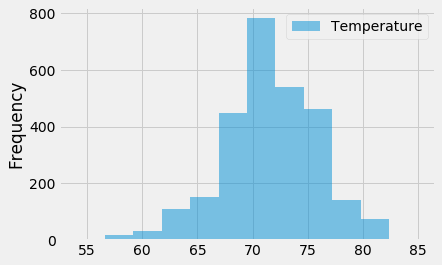

In [41]:
# reference https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hist.html
ax = temp_record_df.plot.hist(bins=12, alpha=0.5)

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
